In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='GarageQual'>

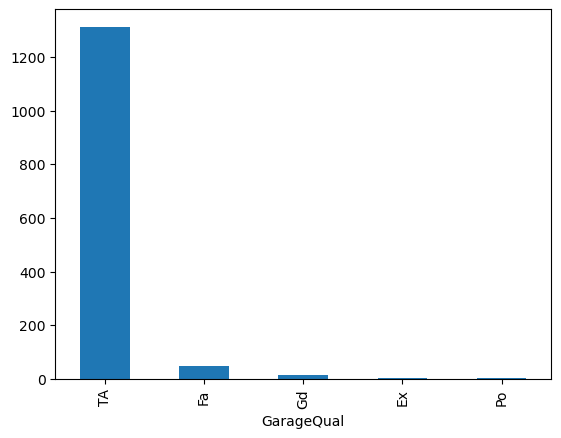

In [2]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df['GarageQual'].value_counts().plot(kind = 'bar')

In [12]:
df.isnull().mean()*100
# df.isnull().sum()

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [3]:
df['GarageQual'].fillna('TA',inplace=True)

<Axes: ylabel='Density'>

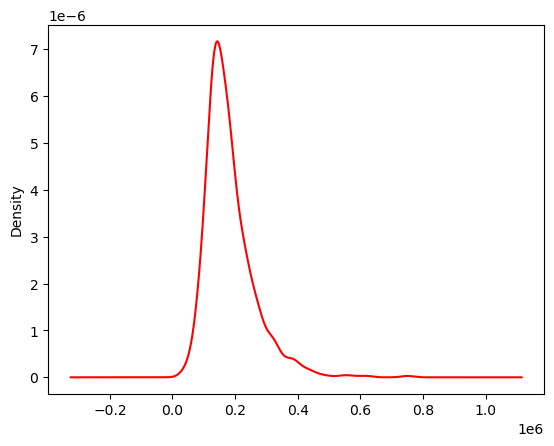

In [7]:
# df['GarageQual'].value_counts().plot(kind='bar')
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',color='red',ax=ax)

Text(0.5, 1.0, 'fire')

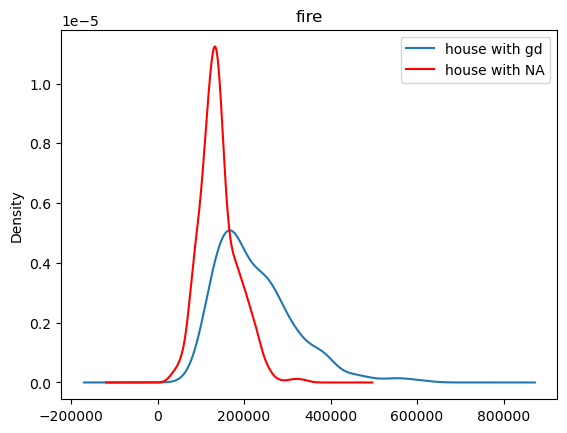

In [16]:
# df['FireplaceQu'].isnull().sum()
# df['FireplaceQu'].isnull()
# df.isnull().sum()
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
labels = ['house with gd','house with NA']
ax.legend(lines,labels,loc='best')
plt.title('fire')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'] , test_size=0.2)

In [25]:
imputer =SimpleImputer(strategy ='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test =imputer.transform(X_test)
# imputer.statistics_


array(['Gd', 'TA'], dtype=object)